<a href="https://colab.research.google.com/github/ashwinkrishna948/bike-prices-prediction-linear-regression/blob/main/Bike_Prices_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [ ]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [ ]:
df.shape

(626, 8)

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace = True)

In [ ]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2 , '4th owner':3}},inplace = True)

In [ ]:
#X = pd.get_dummies(X, columns=['Seller_Type','Owner'], drop_first = True)

In [ ]:
y = df['Selling_Price']

In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
X = df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [ ]:
X.shape

(626, 5)

In [ ]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 2529)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((438, 5), (188, 5), (438,), (188,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([ 27210.52271462,  56340.08335163,  63471.94671997,  53627.63844782,
        55612.75744265,  53888.92259717,  33751.35275099,  60311.49501832,
       113713.05684472,  76639.49332957,  27826.73993808,  49919.83255841,
        65886.64311457,  26755.12664063,  48277.75426035, 127646.56079345,
        70047.10661635,  39350.67963652,  36081.03597876,  45360.79436338,
        48079.89470575,  44803.02464796,  55161.4402611 ,  71041.51821319,
        91689.22699165,  49301.53594642,  55988.19326252, 108171.54600301,
        32771.06897898,  25468.20072995,  17128.61806162, 179271.41130767,
        45698.99857621,  31371.09285079,  67886.52106737,  41492.49575813,
        56855.222386  ,  47820.47003466,  74682.14053958,  24984.21822733,
        55374.00513698,  41412.3677522 ,  67991.60287764,  26553.5942184 ,
        89788.69870691,  45764.83633684, 133888.037704  , 106988.11382509,
        71176.40667715,  25332.25485943,  79512.43778826,  63914.38088173,
        28632.12110983,  

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

554715615.5024884

In [ ]:
mean_absolute_error(y_test,y_pred)

12225.737010402318

In [ ]:
r2_score(y_test,y_pred)

0.8810414402988965

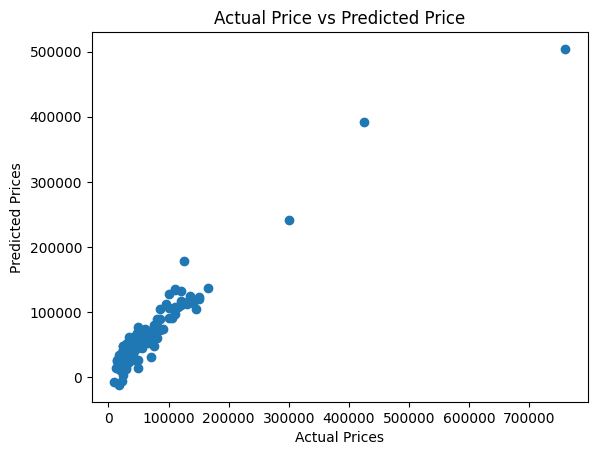

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
202,Suzuki,Suzuki Access 125 [2007-2016],25000,2012,0,0,55000,58314.0


In [ ]:
df_new.shape

(1, 8)

In [ ]:
X_new = df_new.drop(['Brand','Model','Selling_Price'], axis = 1)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([27826.73993808])